In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [31]:
M = 20
np.random.seed(1)
ps = np.random.random(M)*0.9 + 0.1
data = defaultdict(list)

In [33]:
# check how least singular value grows
ns = [100, 250, 500, 1000, 2500, 5000, 10000, 25000, 50000, 100000]
for i in range(500):
    for n in ns:
        artist = np.hstack((np.random.binomial(1, ps[0], size=n)))
        matrix = artist.reshape(1, -1)
        for j in range(M-1):
            artist = np.hstack((np.random.binomial(1, ps[j+1], size=n)))
            matrix = np.vstack((matrix, artist))
        X = matrix.T
        X.shape
        cov = X.T @ X
        evals, evecs = np.linalg.eig(cov)
        data[n].append(min(evals))

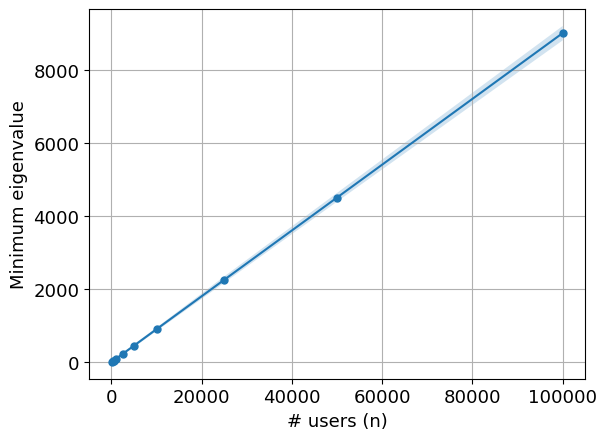

In [38]:
plt.rcParams.update({'font.size': 13})
max_eigs = [np.percentile(data[n], 99) for n in ns]
min_eigs = [np.percentile(data[n], 1) for n in ns]
mean_eigs = [np.mean(data[n]) for n in ns]
plt.plot(ns, mean_eigs, marker='o', markersize=5, linewidth=1.5)
plt.fill_between(ns, min_eigs, max_eigs, alpha=0.2)
plt.grid()
plt.xlabel('# users (n)')
plt.ylabel('Minimum squared singular value')